## 1. Моделирование аналогового, дискретного, квантованного и цифрового сигнала
### 1.1. Инициализация и формирование значений основных параметров
Имитационное моделирование аналогового, дискретного и квантованного
сигнала на примере функции косинуса

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import extrafuncs as extras
from sympy import symbols
from sympy import cos
from sympy import pi
from sympy.plotting import plot
from matplotlib import rcParams
from extrafuncs import quantiz
from sympy.utilities.lambdify import lambdify

In [2]:
# отрисовка непосредственно в ноутбуке
%matplotlib inline

In [3]:
# Настройка параметров шрифта
# и настройка LaTex для вставки в заголовки на графике

fontSize = 12.0   # Размер шрифта графиков
titleFontSize = 16.0    # Размер шрифта заголовка
fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = "{}:bold".format(fontName)    # Жирный
rcParams["mathtext.it"] = "{}:italic".format(fontName)  # Курсив

In [4]:
PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
fontSize = 10   # Размер шрифта графиков
fontType = ''   # Тип шрифта график
tColor = "#0000FF"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
# fColor =    # Частотная область
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности
A = 2   # Амплитуда сигнала, В
fz = 0.2    # Частота сигнала, Гц
fd = 5  # Частота дискретизации, Гц
x = symbols('x')    # Определение символьной переменной
b = 4   # Разрядность АЦП
tmin = -2.5 # Начальное время моделирования
tmax = 2.5  # Конечное время моделирования

### 1.2. Моделирование аналогового сигнала

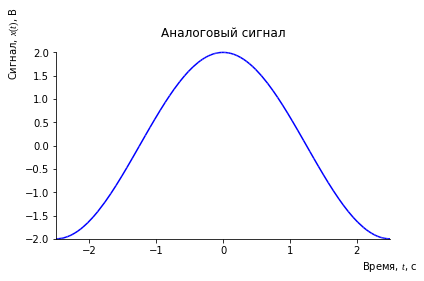

In [16]:
sig = A * cos(2 * pi * x * fz)  # Формирование значений

# Формирование графика
p = plot(sig, (x, tmin, tmax), line_color=tColor, show=False)
p.title = "Аналоговый сигнал"   # Заголовок
p.xlabel = r"Время, $\mathit{t}$, с"    # Надпись оси абсцисс
p.ylabel = r"Сигнал, $\mathit{x(t)}$, В"    # Надпись оси ординат
p.axis_center = (-2.5, -2.0)    # Положение осей графика
p.show()    # Отрисовка графика

### 1.3. Моделирование дискретного сигнала

In [6]:
# Формирование области определения
td = np.linspace(tmin, tmax, np.rint((tmax - tmin) * fd).astype(int) + 1)
sigdify = lambdify(x, sig)  # Формирование функции возвращающей значение символьной функции по аргументу х
xd = np.array([sigdify(i) for i in td]) # Преобразование символьного выражения в числовое
x_ticks = np.round(td, 2)   # Шаг деления оси абсцисс с точностью до 2 знаков

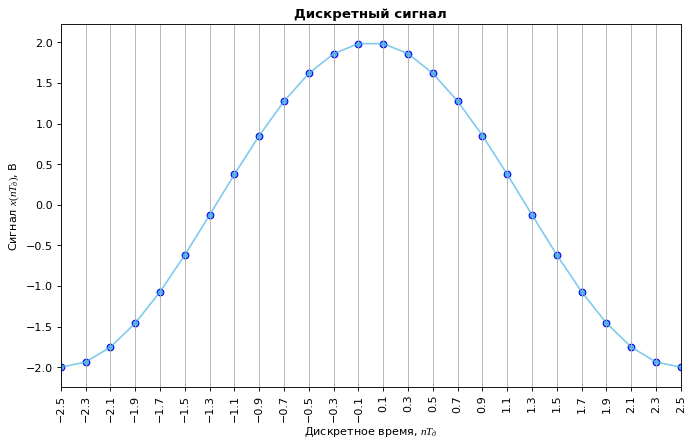

In [7]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Задания размера картинки в дюймах и плотности пикселей
plt.title("Дискретный сигнал", fontweight="bold")   # Заголовок с жирным шрифтом
plt.ylabel(r"Cигнал $\mathit{x(nT_д)}$, В")    # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_д}$")  # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.xticks(x_ticks, rotation=90)  # Шаг деления оси абсцисс 0.2
plt.grid(axis='x')  # Добавление вертикальных линий на график
plt.plot(td, xd, color=tColorLight, alpha=0.7)    # Соединение точек на графике
plt.scatter(td, xd, edgecolors=tColor, color=tColorLight) # Построение точечного графика

plt.show()  # Отображение графика

### 1.4. Моделирование квантованного сигнала

In [8]:
# Функция arange возвращает равномерно разделённый интервал с заданным количеством разбиений,
# НО не включает последнее значение (возвращает полуинтервал).
# Поэтому правая граница передана в arange больше на q.
# Последний элемент codebook бесконечно близок к правой границе,
# Поэтому для исключения дальнейших ошибок он приравнен к правой границе.

N = 2**b    # Количество уровней квантования
q = 2 * A / (N - 1) # Шаг квантования
codebook = np.arange(-A, A + q, q)  # Уровни квантования сигнала
codebook[-1] = A    # Изменения последнего элемента
ind = np.digitize(xd, codebook) # Получение индексов квантованного сигнала

# На основе полученных индексов формируются значения квантованного сигнала.
# Функция digitize возвращает индексы включая левую границу.
# При равенстве элемента правой границе функция возвращает номер последнего элемента + 1 (т.е. выходит за границы массива).
# Поэтому списковое включение(list comprehension) отлавливает данное поведение.

D = np.array([quantiz(codebook[ind[n] - 1], codebook[ind[n]], xd[n]) if ind[n] != codebook.size else quantiz(codebook[ind[n] - 2], codebook[ind[n] - 1], xd[n]) for n in range(ind.size)])
d_yticks = np.round(codebook, 2)    # Шаг деления оси ординат с точностью до 2 знаков

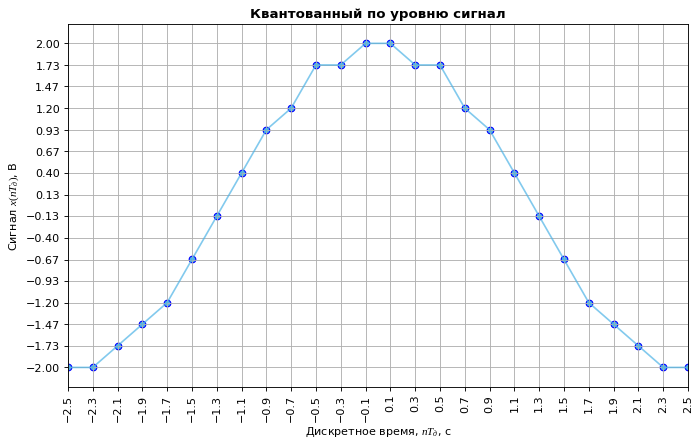

In [9]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Задания размера картинки в дюймах и плотности пикселей
plt.title("Квантованный по уровню сигнал", fontweight="bold")   # Заголовок с жирным шрифтом
plt.ylabel(r"Cигнал $\mathit{x(nT_д)}$, В")    # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_д}$, с")    # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.xticks(x_ticks, rotation=90)  # Шаг деления оси абсцисс 0.2
plt.yticks(d_yticks)    # Шаг деления оси ординат
plt.grid(True)  # Добавление сетки на график
plt.scatter(td, D, color=tColorLight, edgecolors=tColor)  # Построение точечного графика
plt.plot(td, D, color=tColorLight, alpha=0.7) # Соединение точек на графике

plt.show()  # Отображение графика

### 1.5. Моделирование цифрового сигнала

In [10]:
codes = np.arange(-N // 2, N // 2)  # Массив кодированных значений
bincodes = extras.dec2compl(codes, b)   # Перевод чисел в дополнительный код

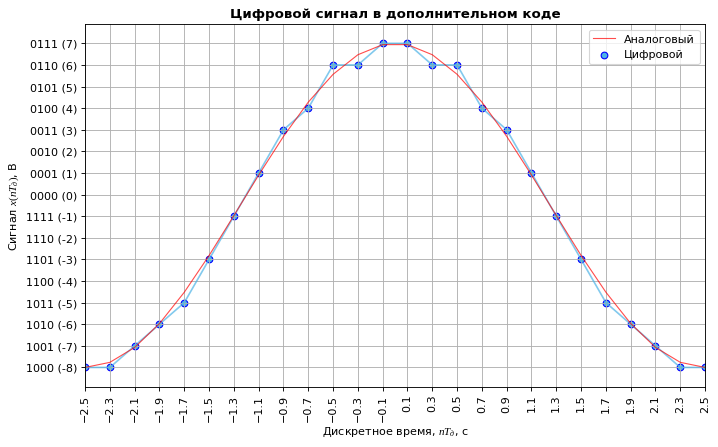

In [11]:
fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY)   # Задания размера картинки в дюймах и плотности пикселей
axis = plt.axes()   # Получение осей графика
plt.title("Цифровой сигнал в дополнительном коде", fontweight="bold")   # Заголовок с жирным шрифтом
plt.ylabel(r"Cигнал $\mathit{x(nT_д)}$, В")    # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_д}$, с")    # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.xticks(td, rotation=90)  # Шаг деления оси абсцисс
plt.yticks(np.linspace(D.min(), D.max(), len(bincodes)))    # Деление оси ординат
axis.set_yticklabels(bincodes)  # Нанесение дополнительного кода на ось ординат
plt.grid(True)  # Добавление сетки на график
plt.scatter(td, D, color=tColorLight, edgecolors=tColor, label="Цифровой")  # Построение точечного графика
plt.plot(td, D, color=tColorLight, alpha=0.7) # Соединение точек на графике
plt.plot(td, xd, color=Color0, alpha=0.7, linewidth=1, label="Аналоговый") # Соединение точек на графике
plt.legend()

plt.show()  # Отображение графика

### 1.6. Вычисление абсолютной погрешности цифрового сигнала

In [12]:
ex = D - xd  # Формирование значений

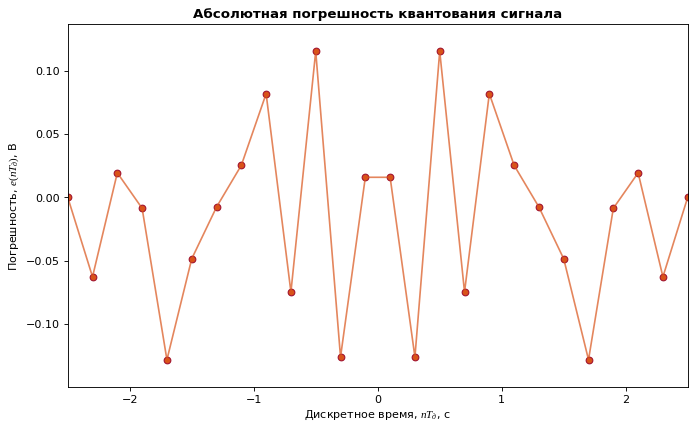

In [13]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Задания размера картинки в дюймах и плотности пикселей
plt.title("Абсолютная погрешность квантования сигнала", fontweight="bold")  # Заголовок с жирным шрифтом
plt.ylabel(r"Погрешность, $\mathit{e(nT_д)}$, В")  # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_д}$, с")   # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.scatter(td, ex, color=eColor, edgecolors=eColorDark) # Построение точечного графика
plt.plot(td, ex, color=eColor, alpha=0.7)    # Соединение точек на графике

plt.show()  # Отображение графика

In [14]:
nBars = 8   # Количество диапазонов отклонений
edges = np.linspace(-A / (N - 1), A / (N - 1), nBars)   # Формирование границ диапазонов

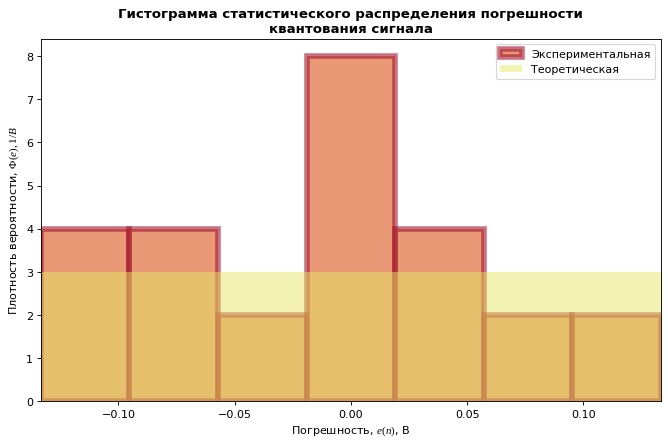

In [15]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY)   # Задания размера картинки в дюймах и плотности пикселей
axis = plt.axes()   # Получение осей графика
plt.title("""Гистограмма статистического распределения погрешности
квантования сигнала""", fontweight="bold")  # Заголовок с жирным шрифтом
plt.ylabel(r"Плотность вероятности, $\mathit{\Phi(e), 1/B}$")   # Надпись оси ординат 
plt.xlabel(r"Погрешность, $\mathit{e(n)}$, В")  # Надпись оси абсцисс
plt.xlim(edges[0], edges[-1])   # Пределы по оси абсцисс
an, bins, patchs = plt.hist(ex, edges, color=eColor, alpha=0.6, edgecolor=eColorDark, linewidth=5, label="Экспериментальная")
norm = np.array([np.random.uniform(edges[i], edges[i + 1]) for j in range(int(np.round(an.sum() / nBars))) for i in range(nBars - 1)])  # Расчёт нормализации
plt.hist(norm, edges, color=eColorLight, alpha=0.5, label="Теоретическая")
plt.legend()    # Добавление подписей к графикам

plt.show()  # Отображение графика